# Import Everything
## Import necessary modules

In [23]:

import numpy as np
import os
from pathlib import Path
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split
from sklearn.tree import DecisionTreeClassifier
from yellowbrick.classifier import ConfusionMatrix

main_path = os.getcwd()
parent_path = Path(os.getcwd()).parent
src_path = str(parent_path) + "/src/directories"
os.chdir(src_path)

import change_directory

os.chdir(main_path)

## Import data

In [6]:
cd = change_directory.ChangeDirectory()
cd.change_to_data_dir()
ccd_df = pd.read_csv("processed/processed_credit_card_defaults.csv")
cd.change_to_notebook_dir()

,LIMIT_BAL,AGE,Bill_amount_Sep,Bill_amount_Aug,Bill_amount_Jul,Bill_amount_Jun,Bill_amount_May,Bill_amount_Apr,Bill_amount_Sep.1,Bill_amount_Aug.1,...,Payment_hist_Apr_-2,Payment_hist_Apr_-1,Payment_hist_Apr_0,Payment_hist_Apr_2,Payment_hist_Apr_3,Payment_hist_Apr_4,Payment_hist_Apr_5,Payment_hist_Apr_6,Payment_hist_Apr_7,Payment_hist_Apr_8
0,20000,24,3913,3102,689,0,0,0,0,689,...,1,0,0,0,0,0,0,0,0,0
1,120000,26,2682,1725,2682,3272,3455,3261,0,1000,...,0,0,0,1,0,0,0,0,0,0
2,90000,34,29239,14027,13559,14331,14948,15549,1518,1500,...,0,0,1,0,0,0,0,0,0,0
3,50000,37,46990,48233,49291,28314,28959,29547,2000,2019,...,0,0,1,0,0,0,0,0,0,0
4,50000,57,8617,5670,35835,20940,19146,19131,2000,36681,...,0,0,1,0,0,0,0,0,0,0


# Begin Model Building
## Train-Test Split

In [9]:
ccd_df.columns

Index(['LIMIT_BAL', 'AGE', 'Bill_amount_Sep', 'Bill_amount_Aug',
       'Bill_amount_Jul', 'Bill_amount_Jun', 'Bill_amount_May',
       'Bill_amount_Apr', 'Bill_amount_Sep.1', 'Bill_amount_Aug.1',
       'Bill_amount_Jul.1', 'Bill_amount_Jun.1', 'Bill_amount_May.1',
       'Bill_amount_Apr.1', 'DEFAULT', 'FEMALE', 'GRADUATE_SCHOOL',
       'UNIVERSITY', 'HIGH_SCHOOL', 'EDUCATION_OTHERS', 'EDUCATION_UNKNOWN_1',
       'EDUCATION_UNKNOWN_2', 'MARRIED', 'SINGLE', 'MARRIAGE_OTHERS',
       'Payment_history_Sept_-2', 'Payment_history_Sept_-1',
       'Payment_history_Sept_0', 'Payment_history_Sept_1',
       'Payment_history_Sept_2', 'Payment_history_Sept_3',
       'Payment_history_Sept_4', 'Payment_history_Sept_5',
       'Payment_history_Sept_6', 'Payment_history_Sept_7',
       'Payment_history_Sept_8', 'Payment_history_Aug_-2',
       'Payment_history_Aug_-1', 'Payment_history_Aug_0',
       'Payment_history_Aug_1', 'Payment_history_Aug_2',
       'Payment_history_Aug_3', 'Payment_hist

In [10]:
X = ccd_df.drop('DEFAULT', axis=1)
y = ccd_df.DEFAULT
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2819)

In [41]:
ccd_dt = DecisionTreeClassifier()
class_weights_gs = [{0:100, 1:1}, 'balanced', {0:10, 1:1}]
param_grid = {'criterion': ['gini', 'entropy'],
              'max_depth':[None, 8, 10],
              'min_samples_split':[10, 25],
              'min_samples_leaf':[1, 5],
              'max_features':[None, 'sqrt'], 
              'class_weight':class_weights_gs }

dt_gs = GridSearchCV(ccd_dt, param_grid, cv=5, scoring='recall', refit=True)

In [42]:
dt_gs.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [None, 8, 10], 'min_samples_split': [10, 25], 'min_samples_leaf': [1, 5], 'max_features': [None, 'sqrt'], 'class_weight': [{0: 100, 1: 1}, 'balanced', {0: 10, 1: 1}]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='recall', verbose=0)

### Evaluating the best tree

In [43]:
dt_gs.best_params_

{'class_weight': 'balanced',
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 5,
 'min_samples_split': 25}

In [44]:
best_tree = DecisionTreeClassifier(**dt_gs.best_params_)

In [35]:
dt_gs.cv_results_

/Users/anthonyschams/anaconda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/anthonyschams/anaconda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/anthonyschams/anaconda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/ant

{'mean_fit_time': array([0.74866838, 0.73016758, 0.45502548, 0.44597082, 0.07483826,
        0.07177744, 0.05769267, 0.05328369, 0.1950212 , 0.19534326,
        0.19586797, 0.19613199, 0.03081446, 0.02950597, 0.03038316,
        0.02736869, 0.24296565, 0.23597336, 0.23494263, 0.23633208,
        0.03497906, 0.03558326, 0.03339596, 0.03585129, 0.65375366,
        0.6427495 , 0.46401982, 0.45147591, 0.07615819, 0.06901126,
        0.06030512, 0.05769129, 0.23362927, 0.23374829, 0.23018551,
        0.23034191, 0.03071184, 0.03429728, 0.03295765, 0.03316593,
        0.28541937, 0.28439898, 0.28362136, 0.28373322, 0.04142694,
        0.04042993, 0.04013052, 0.03991871, 0.38282957, 0.36558723,
        0.35011625, 0.33542242, 0.05578427, 0.05488963, 0.05443568,
        0.04609966, 0.19140692, 0.19262719, 0.19130158, 0.19007916,
        0.0299933 , 0.03004055, 0.02761388, 0.03114138, 0.22877126,
        0.22968321, 0.22810864, 0.22933784, 0.03618312, 0.03544455,
        0.03508763, 0.03545351,

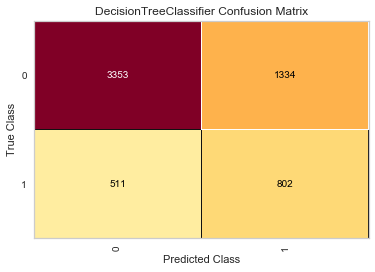

In [45]:
cm = ConfusionMatrix(best_tree, classes=[0, 1])
cm.fit(X_train, y_train)
cm.score(X_test, y_test)
cm.poof()

In [ ]:
cm.